## Step 1 : Reading and Understanding the data

In [1]:
# importing important libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data from CSV file
bike_data = pd.read_csv('day.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Shape of given Dataframe
bike_data.shape

(730, 16)

In [4]:
# desciption of the column of data frame
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# information about the column and it's count
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- From the above observation of the data we will find that there are around 730 data in count and no column is empty so we don't need to perform data imputation part 
- We need to drop such columns that doesn't help in the Model Building and analysis such as instant i.e. Record index by defination is data dictionary 

In [6]:
# Dropping a column 
bike_data.drop(['instant'],axis=1,inplace=True)
bike_data.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

- Column Such as dteday, yr, mnth can infer the same thing. Actully they yr and mnth can be defined by dteday and we can use yr and mnth require in the model building so we can drop the column dteday 

In [7]:
# Dropping a column 
bike_data.drop(['dteday'],axis=1,inplace=True)
bike_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

- According to data dictionary cnt is the target variable for the model building and casual and registered sum is cnt so we don't need those variable as per our business requirement 

In [8]:
# Dropping a column 
bike_data.drop(['casual','registered'],axis=1,inplace=True)
bike_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [9]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## Step 2: Visualising the Data

- To find is there any visual multicollinearity present in data or not
- To find association of predictors with target variable visually

In [10]:
# List of count of unique values in each columns
bike_data.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

- From above list it is very clear 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit' these all are categorical variables .

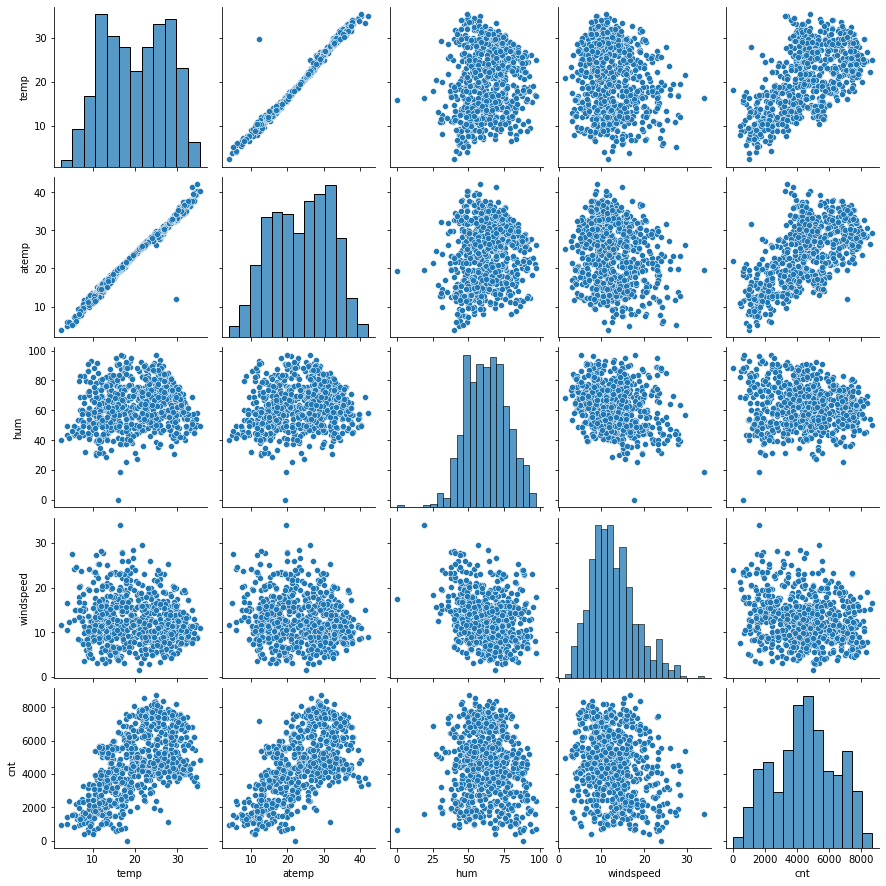

In [11]:
# pairplot of non-categorical variables
sns.pairplot(bike_data, vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

- From above graph we observe that atemp and temp is closely related to each other let's confirmed by correlation of these variable with heatmap

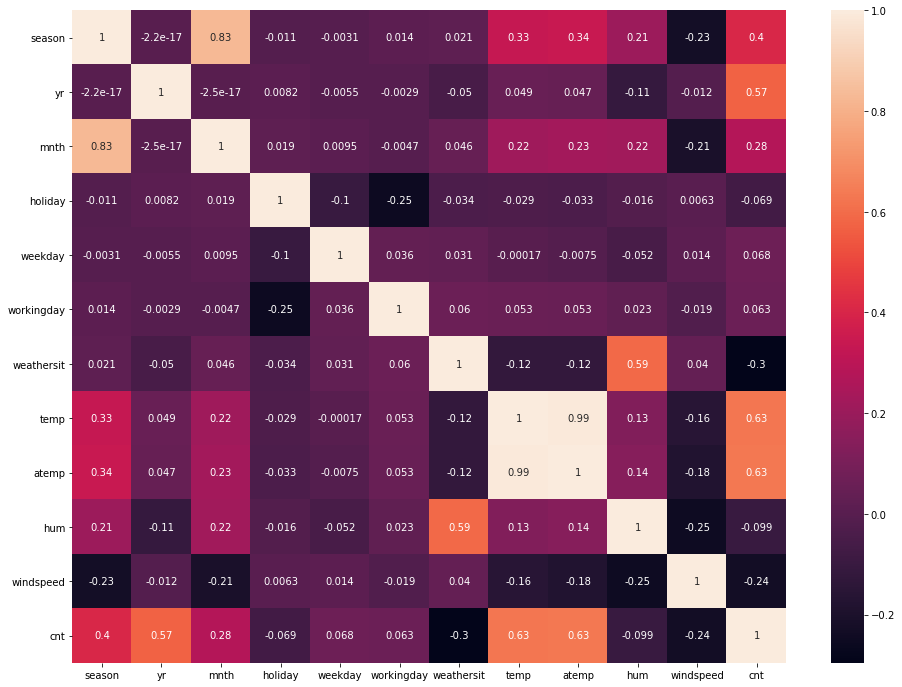

In [12]:
# ploting a heatmap or variables
plt.figure(figsize=(16,12))
sns.heatmap(bike_data.corr(), annot= True)
plt.show()

- From the above heatmap we observe that temp and atemp are correlated with factor of 0.99 so we can take only one of these so let's drop the column 

In [13]:
# dropping a column 
bike_data.drop(['atemp'],axis=1,inplace=True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


- Now let's visualize the categorical variables 

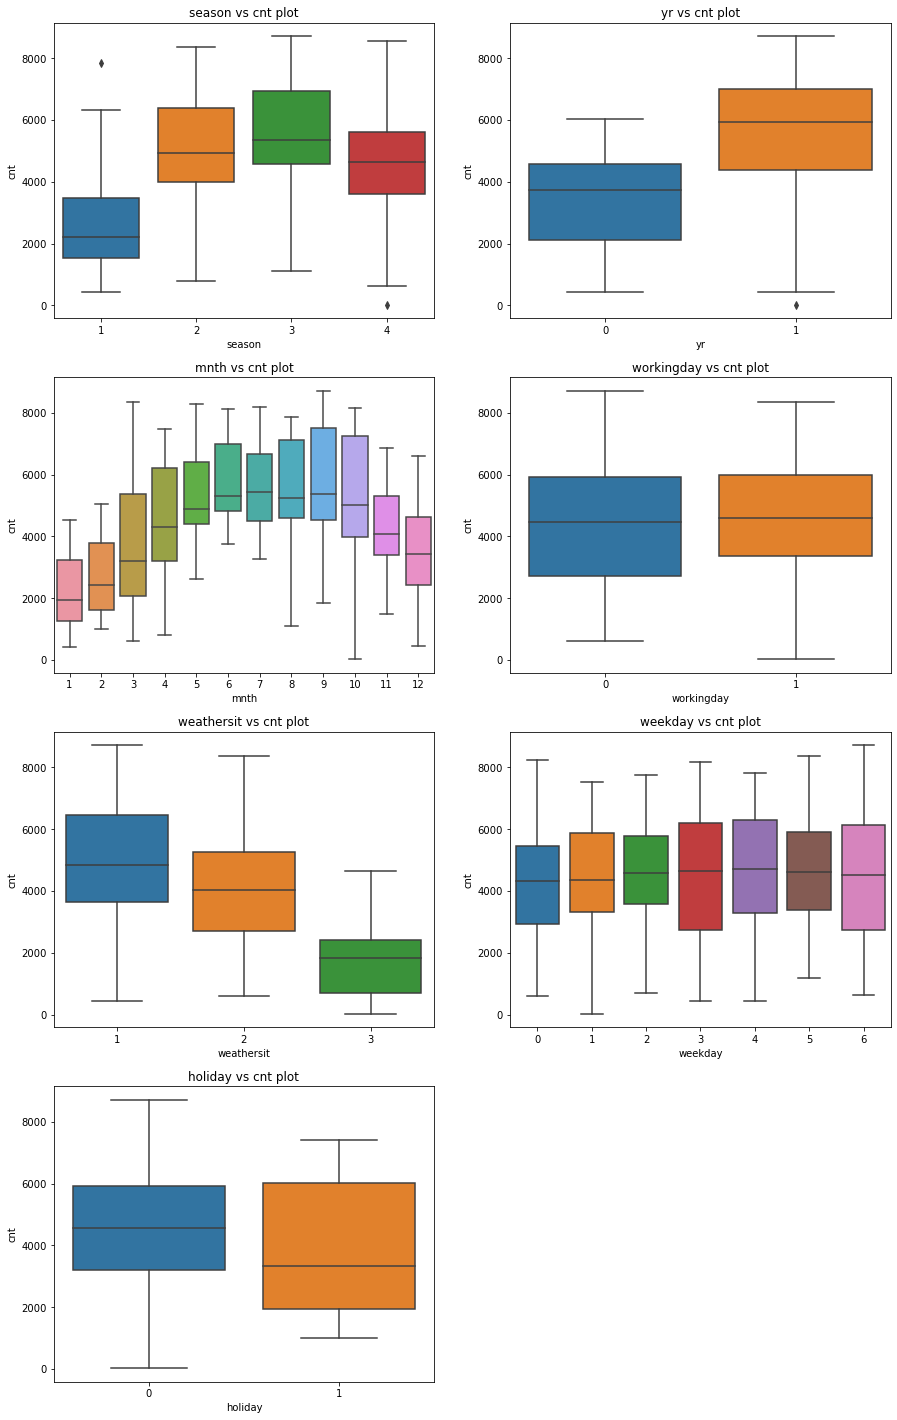

In [14]:
plt.figure(figsize=(15, 25))
plt.subplot(4,2,1)
plt.title('season vs cnt plot')
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(4,2,2)
plt.title('yr vs cnt plot')
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(4,2,3)
plt.title('mnth vs cnt plot')
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(4,2,4)
plt.title('workingday vs cnt plot')
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.subplot(4,2,5)
plt.title('weathersit vs cnt plot')
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.subplot(4,2,6)
plt.title('weekday vs cnt plot')
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(4,2,7)
plt.title('holiday vs cnt plot')
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.show()

 ## Step 3: Data Preparation
 
 - There are some categorical variable whose value mentioned in the data dictonary we can replace those value with it's original significance 
 

In [15]:
# replacing the data with it's values according to data dictonary 

# data dictonary of values 
seasons = {
    1:'spring', 
    2:'summer',
    3:'fall',
    4:'winter'
}

weather = {
    1:"Clear, Few clouds, Partly cloudy, Partly cloudy",
    2:"Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
    3:"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
    4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
}

day_of_week = {
    0:"Sunday",
    1:"Monday",
    2:"Tuesday",
    3:"Wednesday",
    4:"Thursday",
    5:"Friday",
    6:"Saturday"
}

year = {
    0: '2018',
    1: '2019'
}

month = {
    1:'Jan', 
    2:'Feb', 
    3:'Mar', 
    4:'Apr', 
    5:'May', 
    6:'Jun', 
    7:'Jul', 
    8:'Aug', 
    9:'Sep', 
    10:'Oct', 
    11:'Nov', 
    12:'Dec'
}

In [16]:
# replace the values according to dictonary
bike_data['season'].replace(seasons, inplace=True)
bike_data['yr'].replace(year, inplace=True)
bike_data['mnth'].replace(month, inplace=True)
bike_data['weekday'].replace(day_of_week, inplace=True)
bike_data['weathersit'].replace(weather, inplace=True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,Saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,43.6957,12.522300,1600


### Dummy Variables

In [17]:
# dummy variables with first value dropped 
dummy_variables = pd.get_dummies(bike_data[['season', 'yr', 'mnth', 'weekday','weathersit']],drop_first=True)
dummy_variables.columns

Index(['season_spring', 'season_summer', 'season_winter', 'yr_2019',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

In [18]:
# concat with the data frame 
bike_dummy = pd.concat([bike_data,dummy_variables],axis=1)
bike_dummy.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

- Now we can drop the variables which we added as a dummy variable in data frame 

In [19]:
# dropping of original variablesabs 
bike_dummy.drop(['season', 'yr', 'mnth', 'weekday','weathersit'],axis=1,inplace=True)
bike_dummy.columns

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'yr_2019',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

In [20]:
# check the shape of data frame
bike_dummy.shape

(730, 29)

## Step 4: Splitting the Data into Training and Testing Sets


In [21]:
# library important for train and test data split 
from sklearn.model_selection import train_test_split

In [22]:
train_bike, test_bike = train_test_split(bike_dummy, train_size = 0.7, random_state = 50)
print(train_bike.shape)
print(test_bike.shape)

(510, 29)
(220, 29)


- Now we will scale the data with the help of min max scaling so that the columns will have in comparable form

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [24]:
# standardise the values
scale_var=['temp','hum','windspeed','cnt']
train_bike[scale_var] = scaler.fit_transform(train_bike[scale_var])
train_bike.describe()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.023529,0.707843,0.552655,0.644402,0.317884,0.510488,0.245098,0.254902,0.250980,0.482353,...,0.086275,0.064706,0.152941,0.135294,0.133333,0.145098,0.150980,0.139216,0.031373,0.341176
std,0.151726,0.455201,0.230616,0.149118,0.167384,0.223400,0.430568,0.436234,0.434003,0.500179,...,0.281045,0.246248,0.360284,0.342373,0.340268,0.352545,0.358381,0.346511,0.174494,0.474570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.343347,0.524581,0.197845,0.350523,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.553497,0.648347,0.295422,0.517027,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.757231,0.752146,0.406471,0.672141,0.000000,1.000000,0.750000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
# find the correlation in all variables 
train_bike.corr()['cnt'].sort_values()

season_spring                                                                                        -0.563611
mnth_Jan                                                                                             -0.354084
mnth_Feb                                                                                             -0.273703
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds   -0.256403
windspeed                                                                                            -0.219583
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                              -0.175007
mnth_Mar                                                                                             -0.164216
mnth_Dec                                                                                             -0.160958
hum                                                                                                  -0.103036
m

- The most correlated value with cnt is temp

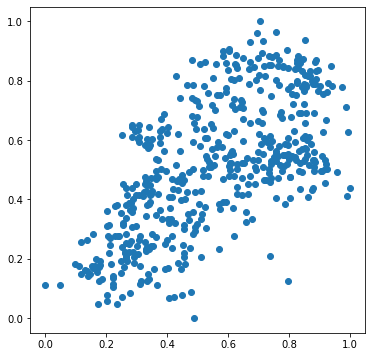

In [26]:
# find the relation between temp and cnt
plt.figure(figsize=[6,6])
plt.scatter(train_bike.temp, train_bike.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [27]:
y_train_bike = train_bike.pop('cnt')
X_train_bike = train_bike

## Step 5: Building a linear model

In [28]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train_bike[['temp']])

# Create a first fitted model
lr_model = sm.OLS(y_train_bike, X_train_lm).fit()

In [29]:
# params of linear model
lr_model.params

const    0.168214
temp     0.619326
dtype: float64

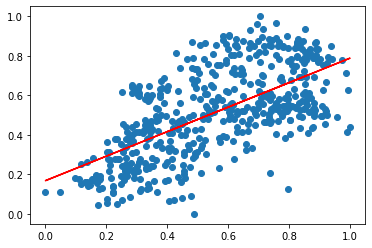

In [30]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm['temp'],y_train_bike)
plt.plot(X_train_lm['temp'],X_train_lm['temp']*0.619326 + 0.168214,'r')
plt.show()

In [31]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     351.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           5.93e-60
Time:                        21:29:16   Log-Likelihood:                 175.23
No. Observations:                 510   AIC:                            -346.5
Df Residuals:                     508   BIC:                            -338.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1682      0.020      8.501      0.0

- From above data we interpret that the R^2 value of above model is .409 that is good but we can improve the model by adding more variables 

### Step 6 : Adding more variable (Multiple Linear Regression)

- For adding more variable our approach is Both automated and mannually. We Use mixed approach
    - First we go for RFE Method to select data 
    - after RFE we mannually select the variables

In [32]:
# importing important libraries for the RFE 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [33]:
# creating a linear regression model 
lm = LinearRegression()
lm.fit(X_train_bike, y_train_bike)
# creating a rfe for linear regression model 
rfe = RFE(lm, 20)            
rfe = rfe.fit(X_train_bike, y_train_bike)

In [34]:
list(zip(X_train_bike.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', True, 1),
 ('mnth_Mar', False, 8),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 5),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', True, 1),
 ('weekday_Saturday', False, 2),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 9),
 ('weekday_Tuesday', False, 4),
 ('weekday_Wednesday', False, 6),
 ('weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
  True,
  1),
 ('weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
  True,
  1)]

In [35]:
col = X_train_bike.columns[rfe.support_]
col

Index(['holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Jun', 'mnth_May', 'mnth_Nov', 'mnth_Sep',
       'weekday_Monday', 'weekday_Sunday',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

In [36]:
other = X_train_bike.columns[~rfe.support_]
other

Index(['workingday', 'mnth_Aug', 'mnth_Mar', 'mnth_Oct', 'weekday_Saturday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [37]:
# building dataframe of supported column in rfe
X_train_rfe = X_train_bike[col]

In [38]:
# adding a constant to model
X_train_model = sm.add_constant(X_train_rfe)

In [39]:
# Building model using statsmodel api 
rfe_model = sm.OLS(y_train_bike,X_train_model).fit()
rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     145.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.78e-191
Time:                        21:29:16   Log-Likelihood:                 535.85
No. Observations:                 510   AIC:                            -1030.
Df Residuals:                     489   BIC:                            -940.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.3666      0.037      9.825      0.000       0.293       0.440
holiday                                                                                               -0.0479      0.027     -1.797      0.073      -0.100       0.004
temp                                                                                                   0.4462      0.041     10.871      0.000       0.366       0.527
hum                                                                                                   -0.2032      0.038     -5.372      0.000      -0.278      -0.129
windspeed                                                                                             -0.1910      0.025     -7.607      0.000      -0.240      -0.142
season_spring                                                                                         -0.0659      0.022     -2.982      0.003      -0.109      -0.022
season_summer                                                                                          0.0267      0.017      1.531      0.126      -0.008       0.061
season_winter                                                                                          0.1136      0.018      6.340      0.000       0.078       0.149
yr_2019                                                                                                0.2329      0.008     29.797      0.000       0.218       0.248
mnth_Dec                                                                                              -0.0574      0.018     -3.245      0.001      -0.092      -0.023
mnth_Feb                                                                                              -0.0295      0.020     -1.478      0.140      -0.069       0.010
mnth_Jan                                                                                              -0.0554      0.021     -2.600      0.010      -0.097      -0.014
mnth_Jul                                                                                              -0.0221      0.018     -1.194      0.233      -0.058       0.014
mnth_Jun                                                                                               0.0211      0.018      1.203      0.229      -0.013       0.056
mnth_May                                                                                               0.0271      0.018      1.533      0.126      -0.008       0.062
mnth_Nov                                                                     

### Checking VIF


In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,34.51
1,temp,23.40
4,season_spring,5.50
3,windspeed,4.95
6,season_winter,4.21
5,season_summer,3.63
19,"weathersit_Mist + Cloudy, Mist + Broken clouds...",2.47
10,mnth_Jan,2.12
7,yr_2019,2.00
9,mnth_Feb,1.99


- mnth_Jun contains high p-value and 1.70 of VIF so we drop this columns and rebuild the model again

In [41]:
# dropping column
X_train_rfe.drop('mnth_Jun',axis=1,inplace=True)

In [42]:
# adding a constant to model
X_train_model = sm.add_constant(X_train_rfe)
# Building model using statsmodel api 
rfe_model = sm.OLS(y_train_bike,X_train_model).fit()
rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     153.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.54e-192
Time:                        21:29:16   Log-Likelihood:                 535.09
No. Observations:                 510   AIC:                            -1030.
Df Residuals:                     490   BIC:                            -945.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.3609      0.037      9.746      0.000       0.288       0.434
holiday                                                                                               -0.0489      0.027     -1.835      0.067      -0.101       0.003
temp                                                                                                   0.4664      0.037     12.447      0.000       0.393       0.540
hum                                                                                                   -0.2106      0.037     -5.640      0.000      -0.284      -0.137
windspeed                                                                                             -0.1934      0.025     -7.725      0.000      -0.243      -0.144
season_spring                                                                                         -0.0633      0.022     -2.878      0.004      -0.107      -0.020
season_summer                                                                                          0.0328      0.017      1.966      0.050     1.8e-05       0.066
season_winter                                                                                          0.1144      0.018      6.386      0.000       0.079       0.150
yr_2019                                                                                                0.2321      0.008     29.786      0.000       0.217       0.247
mnth_Dec                                                                                              -0.0540      0.017     -3.091      0.002      -0.088      -0.020
mnth_Feb                                                                                              -0.0273      0.020     -1.373      0.170      -0.066       0.012
mnth_Jan                                                                                              -0.0513      0.021     -2.438      0.015      -0.093      -0.010
mnth_Jul                                                                                              -0.0286      0.018     -1.623      0.105      -0.063       0.006
mnth_May                                                                                               0.0191      0.016      1.165      0.244      -0.013       0.051
mnth_Nov                                                                                              -0.0616      0.018     -3.340      0.001      -0.098      -0.025
mnth_Sep                                                                     

In [43]:
# VIF of the Data frame 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,32.44
1,temp,18.97
4,season_spring,5.50
3,windspeed,4.86
6,season_winter,4.21
5,season_summer,3.37
18,"weathersit_Mist + Cloudy, Mist + Broken clouds...",2.45
10,mnth_Jan,2.08
7,yr_2019,1.99
9,mnth_Feb,1.98


- mnth_May contains the high p-value and 1.71 VIF so we remove this column and check the model again 

In [44]:
# dropping column
X_train_rfe.drop('mnth_May',axis=1,inplace=True)

In [45]:
# adding a constant to model
X_train_model = sm.add_constant(X_train_rfe)
# Building model using statsmodel api 
rfe_model = sm.OLS(y_train_bike,X_train_model).fit()
rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     161.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.91e-193
Time:                        21:29:16   Log-Likelihood:                 534.39
No. Observations:                 510   AIC:                            -1031.
Df Residuals:                     491   BIC:                            -950.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.3502      0.036      9.760      0.000       0.280       0.421
holiday                                                                                               -0.0478      0.027     -1.796      0.073      -0.100       0.004
temp                                                                                                   0.4732      0.037     12.779      0.000       0.400       0.546
hum                                                                                                   -0.2020      0.037     -5.516      0.000      -0.274      -0.130
windspeed                                                                                             -0.1939      0.025     -7.745      0.000      -0.243      -0.145
season_spring                                                                                         -0.0604      0.022     -2.761      0.006      -0.103      -0.017
season_summer                                                                                          0.0416      0.015      2.808      0.005       0.012       0.071
season_winter                                                                                          0.1159      0.018      6.481      0.000       0.081       0.151
yr_2019                                                                                                0.2322      0.008     29.783      0.000       0.217       0.247
mnth_Dec                                                                                              -0.0527      0.017     -3.020      0.003      -0.087      -0.018
mnth_Feb                                                                                              -0.0263      0.020     -1.322      0.187      -0.065       0.013
mnth_Jan                                                                                              -0.0500      0.021     -2.377      0.018      -0.091      -0.009
mnth_Jul                                                                                              -0.0291      0.018     -1.651      0.099      -0.064       0.006
mnth_Nov                                                                                              -0.0603      0.018     -3.274      0.001      -0.096      -0.024
mnth_Sep                                                                                               0.0641      0.018      3.584      0.000       0.029       0.099
weekday_Monday                                                               

In [46]:
# VIF of the Data frame 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,32.15
1,temp,18.97
4,season_spring,5.49
3,windspeed,4.80
6,season_winter,4.19
5,season_summer,2.84
17,"weathersit_Mist + Cloudy, Mist + Broken clouds...",2.45
10,mnth_Jan,2.08
7,yr_2019,1.99
9,mnth_Feb,1.98


- mnth_Feb contains the high p-value and 1.98 VIF so we remove this column and check the model again  

In [47]:
# dropping column
X_train_rfe.drop('mnth_Feb',axis=1,inplace=True)

In [48]:
# adding a constant to model
X_train_model = sm.add_constant(X_train_rfe)
# Building model using statsmodel api 
rfe_model = sm.OLS(y_train_bike,X_train_model).fit()
rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     170.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.24e-193
Time:                        21:29:17   Log-Likelihood:                 533.48
No. Observations:                 510   AIC:                            -1031.
Df Residuals:                     492   BIC:                            -954.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.3414      0.035      9.675      0.000       0.272       0.411
holiday                                                                                               -0.0501      0.027     -1.885      0.060      -0.102       0.002
temp                                                                                                   0.4841      0.036     13.400      0.000       0.413       0.555
hum                                                                                                   -0.2026      0.037     -5.529      0.000      -0.275      -0.131
windspeed                                                                                             -0.1933      0.025     -7.715      0.000      -0.243      -0.144
season_spring                                                                                         -0.0682      0.021     -3.240      0.001      -0.110      -0.027
season_summer                                                                                          0.0438      0.015      2.970      0.003       0.015       0.073
season_winter                                                                                          0.1167      0.018      6.525      0.000       0.082       0.152
yr_2019                                                                                                0.2319      0.008     29.734      0.000       0.217       0.247
mnth_Dec                                                                                              -0.0453      0.017     -2.738      0.006      -0.078      -0.013
mnth_Jan                                                                                              -0.0356      0.018     -1.976      0.049      -0.071      -0.000
mnth_Jul                                                                                              -0.0296      0.018     -1.675      0.095      -0.064       0.005
mnth_Nov                                                                                              -0.0563      0.018     -3.097      0.002      -0.092      -0.021
mnth_Sep                                                                                               0.0653      0.018      3.649      0.000       0.030       0.100
weekday_Monday                                                                                        -0.0213      0.011     -1.904      0.058      -0.043       0.001
weekday_Sunday                                                               

In [49]:
# VIF of the Data frame 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,31.78
1,temp,18.62
3,windspeed,4.79
4,season_spring,4.33
6,season_winter,4.17
5,season_summer,2.84
16,"weathersit_Mist + Cloudy, Mist + Broken clouds...",2.45
7,yr_2019,1.98
11,mnth_Nov,1.89
10,mnth_Jul,1.64


- we need to remove hum column because it contains very high VIF value

In [50]:
# dropping column
X_train_rfe.drop('hum',axis=1,inplace=True)


In [51]:
# adding a constant to model
X_train_model = sm.add_constant(X_train_rfe)
# Building model using statsmodel api 
rfe_model = sm.OLS(y_train_bike,X_train_model).fit()
rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.39e-188
Time:                        21:29:17   Log-Likelihood:                 518.11
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     493   BIC:                            -930.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.2530      0.032      7.812      0.000       0.189       0.317
holiday                                                                                               -0.0470      0.027     -1.716      0.087      -0.101       0.007
temp                                                                                                   0.4291      0.036     12.000      0.000       0.359       0.499
windspeed                                                                                             -0.1528      0.025     -6.194      0.000      -0.201      -0.104
season_spring                                                                                         -0.0826      0.022     -3.840      0.000      -0.125      -0.040
season_summer                                                                                          0.0351      0.015      2.323      0.021       0.005       0.065
season_winter                                                                                          0.0982      0.018      5.431      0.000       0.063       0.134
yr_2019                                                                                                0.2373      0.008     29.800      0.000       0.222       0.253
mnth_Dec                                                                                              -0.0526      0.017     -3.102      0.002      -0.086      -0.019
mnth_Jan                                                                                              -0.0456      0.018     -2.477      0.014      -0.082      -0.009
mnth_Jul                                                                                              -0.0260      0.018     -1.430      0.153      -0.062       0.010
mnth_Nov                                                                                              -0.0627      0.019     -3.358      0.001      -0.099      -0.026
mnth_Sep                                                                                               0.0507      0.018      2.783      0.006       0.015       0.086
weekday_Monday                                                                                        -0.0243      0.012     -2.111      0.035      -0.047      -0.002
weekday_Sunday                                                                                        -0.0414      0.012     -3.474      0.001      -0.065      -0.018
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Ra

In [52]:
# VIF of the Data frame 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.70
2,windspeed,4.67
5,season_winter,3.04
3,season_spring,2.72
4,season_summer,2.32
6,yr_2019,1.96
10,mnth_Nov,1.82
9,mnth_Jul,1.64
15,"weathersit_Mist + Cloudy, Mist + Broken clouds...",1.59
7,mnth_Dec,1.51


- temp is also contains the high VIF value which we need to drop this column 

In [53]:
X_train_rfe.drop('temp',axis=1,inplace=True)
# adding a constant to model
X_train_model = sm.add_constant(X_train_rfe)
# Building model using statsmodel api 
rfe_model = sm.OLS(y_train_bike,X_train_model).fit()
rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     132.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.77e-162
Time:                        21:29:17   Log-Likelihood:                 452.76
No. Observations:                 510   AIC:                            -873.5
Df Residuals:                     494   BIC:                            -805.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.6020      0.016     37.209      0.000       0.570       0.634
holiday                                                                                               -0.0344      0.031     -1.108      0.269      -0.095       0.027
windspeed                                                                                             -0.1679      0.028     -6.002      0.000      -0.223      -0.113
season_spring                                                                                         -0.2683      0.017    -15.812      0.000      -0.302      -0.235
season_summer                                                                                         -0.0444      0.015     -2.881      0.004      -0.075      -0.014
season_winter                                                                                         -0.0149      0.018     -0.848      0.397      -0.049       0.020
yr_2019                                                                                                0.2476      0.009     27.538      0.000       0.230       0.265
mnth_Dec                                                                                              -0.1246      0.018     -6.917      0.000      -0.160      -0.089
mnth_Jan                                                                                              -0.1119      0.020     -5.603      0.000      -0.151      -0.073
mnth_Jul                                                                                               0.0023      0.020      0.114      0.909      -0.038       0.043
mnth_Nov                                                                                              -0.1268      0.020     -6.237      0.000      -0.167      -0.087
mnth_Sep                                                                                               0.0349      0.021      1.693      0.091      -0.006       0.075
weekday_Monday                                                                                        -0.0195      0.013     -1.490      0.137      -0.045       0.006
weekday_Sunday                                                                                        -0.0460      0.014     -3.405      0.001      -0.073      -0.019
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2895      0.026    -10.945      0.000      -0.341      -0.238
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist      

In [54]:
# VIF of the Data frame 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,3.71
4,season_winter,2.93
2,season_spring,2.72
3,season_summer,2.06
9,mnth_Nov,1.81
5,yr_2019,1.79
14,"weathersit_Mist + Cloudy, Mist + Broken clouds...",1.54
6,mnth_Dec,1.49
7,mnth_Jan,1.48
11,weekday_Monday,1.27


- mnth_Jul contains the high p-value so we drop this column 

In [55]:
X_train_rfe.drop('mnth_Jul',axis=1,inplace=True)
# adding a constant to model
X_train_model = sm.add_constant(X_train_rfe)
# Building model using statsmodel api 
rfe_model = sm.OLS(y_train_bike,X_train_model).fit()
rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     142.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.12e-163
Time:                        21:29:17   Log-Likelihood:                 452.76
No. Observations:                 510   AIC:                            -875.5
Df Residuals:                     495   BIC:                            -812.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.6029      0.014     43.819      0.000       0.576       0.630
holiday                                                                                               -0.0342      0.031     -1.103      0.270      -0.095       0.027
windspeed                                                                                             -0.1681      0.028     -6.034      0.000      -0.223      -0.113
season_spring                                                                                         -0.2691      0.015    -17.609      0.000      -0.299      -0.239
season_summer                                                                                         -0.0452      0.013     -3.355      0.001      -0.072      -0.019
season_winter                                                                                         -0.0157      0.016     -0.971      0.332      -0.047       0.016
yr_2019                                                                                                0.2476      0.009     27.566      0.000       0.230       0.265
mnth_Dec                                                                                              -0.1247      0.018     -6.930      0.000      -0.160      -0.089
mnth_Jan                                                                                              -0.1119      0.020     -5.610      0.000      -0.151      -0.073
mnth_Nov                                                                                              -0.1269      0.020     -6.255      0.000      -0.167      -0.087
mnth_Sep                                                                                               0.0342      0.020      1.739      0.083      -0.004       0.073
weekday_Monday                                                                                        -0.0195      0.013     -1.495      0.136      -0.045       0.006
weekday_Sunday                                                                                        -0.0460      0.013     -3.406      0.001      -0.072      -0.019
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2894      0.026    -10.956      0.000      -0.341      -0.238
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0855      0.010     -8.791      0.000      -0.105      -0.066
=============================================================================

In [56]:
# VIF of the Data frame 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,3.46
4,season_winter,2.83
2,season_spring,2.56
3,season_summer,1.92
8,mnth_Nov,1.81
5,yr_2019,1.74
13,"weathersit_Mist + Cloudy, Mist + Broken clouds...",1.54
6,mnth_Dec,1.49
7,mnth_Jan,1.48
10,weekday_Monday,1.27


- season_winter contains high p value so we remove this column too  

In [57]:
X_train_rfe.drop('season_winter',axis=1,inplace=True)
# adding a constant to model
X_train_model = sm.add_constant(X_train_rfe)
# Building model using statsmodel api 
rfe_model = sm.OLS(y_train_bike,X_train_model).fit()
rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     153.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.95e-164
Time:                        21:29:17   Log-Likelihood:                 452.27
No. Observations:                 510   AIC:                            -876.5
Df Residuals:                     496   BIC:                            -817.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.5981      0.013     46.625      0.000       0.573       0.623
holiday                                                                                               -0.0327      0.031     -1.056      0.291      -0.093       0.028
windspeed                                                                                             -0.1686      0.028     -6.051      0.000      -0.223      -0.114
season_spring                                                                                         -0.2624      0.014    -19.288      0.000      -0.289      -0.236
season_summer                                                                                         -0.0398      0.012     -3.246      0.001      -0.064      -0.016
yr_2019                                                                                                0.2476      0.009     27.568      0.000       0.230       0.265
mnth_Dec                                                                                              -0.1320      0.016     -8.082      0.000      -0.164      -0.100
mnth_Jan                                                                                              -0.1132      0.020     -5.688      0.000      -0.152      -0.074
mnth_Nov                                                                                              -0.1372      0.017     -7.943      0.000      -0.171      -0.103
mnth_Sep                                                                                               0.0363      0.020      1.857      0.064      -0.002       0.075
weekday_Monday                                                                                        -0.0194      0.013     -1.488      0.137      -0.045       0.006
weekday_Sunday                                                                                        -0.0467      0.013     -3.470      0.001      -0.073      -0.020
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2918      0.026    -11.096      0.000      -0.344      -0.240
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0865      0.010     -8.939      0.000      -0.106      -0.067
==============================================================================
Omnibus:                       78.049   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              266.122
Skew:  

In [58]:
# VIF of the Data frame 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,3.18
2,season_spring,2.18
3,season_summer,1.73
4,yr_2019,1.71
12,"weathersit_Mist + Cloudy, Mist + Broken clouds...",1.48
6,mnth_Jan,1.47
9,weekday_Monday,1.26
7,mnth_Nov,1.21
5,mnth_Dec,1.16
8,mnth_Sep,1.16


- holiday contains high p-value so remove that column too 

In [59]:
X_train_rfe.drop('holiday',axis=1,inplace=True)
# adding a constant to model
X_train_model = sm.add_constant(X_train_rfe)
# Building model using statsmodel api 
rfe_model = sm.OLS(y_train_bike,X_train_model).fit()
rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     165.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.23e-165
Time:                        21:29:17   Log-Likelihood:                 451.70
No. Observations:                 510   AIC:                            -877.4
Df Residuals:                     497   BIC:                            -822.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.5984      0.013     46.657      0.000       0.573       0.624
windspeed                                                                                             -0.1699      0.028     -6.102      0.000      -0.225      -0.115
season_spring                                                                                         -0.2631      0.014    -19.362      0.000      -0.290      -0.236
season_summer                                                                                         -0.0396      0.012     -3.230      0.001      -0.064      -0.016
yr_2019                                                                                                0.2476      0.009     27.567      0.000       0.230       0.265
mnth_Dec                                                                                              -0.1321      0.016     -8.086      0.000      -0.164      -0.100
mnth_Jan                                                                                              -0.1129      0.020     -5.674      0.000      -0.152      -0.074
mnth_Nov                                                                                              -0.1391      0.017     -8.091      0.000      -0.173      -0.105
mnth_Sep                                                                                               0.0349      0.020      1.788      0.074      -0.003       0.073
weekday_Monday                                                                                        -0.0229      0.013     -1.814      0.070      -0.048       0.002
weekday_Sunday                                                                                        -0.0464      0.013     -3.446      0.001      -0.073      -0.020
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2906      0.026    -11.059      0.000      -0.342      -0.239
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0861      0.010     -8.904      0.000      -0.105      -0.067
==============================================================================
Omnibus:                       78.285   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.395
Skew:                          -0.687   Prob(JB):                     1.73e-57
Kurtosis:                       6.227   Cond. No.                         8.73
================

In [60]:
# VIF of the Data frame 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,windspeed,3.18
1,season_spring,2.18
2,season_summer,1.73
3,yr_2019,1.71
11,"weathersit_Mist + Cloudy, Mist + Broken clouds...",1.48
5,mnth_Jan,1.47
6,mnth_Nov,1.20
8,weekday_Monday,1.18
4,mnth_Dec,1.16
7,mnth_Sep,1.16


- mnth_Sep so we to drop this column 

In [61]:
X_train_rfe.drop('mnth_Sep',axis=1,inplace=True)
# adding a constant to model
X_train_model = sm.add_constant(X_train_rfe)
# Building model using statsmodel api 
rfe_model = sm.OLS(y_train_bike,X_train_model).fit()
rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     179.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.86e-165
Time:                        21:29:18   Log-Likelihood:                 450.07
No. Observations:                 510   AIC:                            -876.1
Df Residuals:                     498   BIC:                            -825.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.6040      0.012     48.463      0.000       0.580       0.629
windspeed                                                                                             -0.1689      0.028     -6.055      0.000      -0.224      -0.114
season_spring                                                                                         -0.2686      0.013    -20.263      0.000      -0.295      -0.243
season_summer                                                                                         -0.0459      0.012     -3.900      0.000      -0.069      -0.023
yr_2019                                                                                                0.2473      0.009     27.480      0.000       0.230       0.265
mnth_Dec                                                                                              -0.1367      0.016     -8.457      0.000      -0.168      -0.105
mnth_Jan                                                                                              -0.1137      0.020     -5.702      0.000      -0.153      -0.075
mnth_Nov                                                                                              -0.1451      0.017     -8.586      0.000      -0.178      -0.112
weekday_Monday                                                                                        -0.0222      0.013     -1.753      0.080      -0.047       0.003
weekday_Sunday                                                                                        -0.0475      0.013     -3.524      0.000      -0.074      -0.021
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2905      0.026    -11.031      0.000      -0.342      -0.239
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0847      0.010     -8.767      0.000      -0.104      -0.066
==============================================================================
Omnibus:                       80.356   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.386
Skew:                          -0.696   Prob(JB):                     9.63e-61
Kurtosis:                       6.327   Cond. No.                         8.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# VIF of the Data frame 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,windspeed,3.03
1,season_spring,2.10
3,yr_2019,1.70
2,season_summer,1.64
5,mnth_Jan,1.47
10,"weathersit_Mist + Cloudy, Mist + Broken clouds...",1.44
6,mnth_Nov,1.18
7,weekday_Monday,1.18
8,weekday_Sunday,1.16
4,mnth_Dec,1.15


- weekday_Monday also contains high p-value so we need to drop this

In [63]:
X_train_rfe.drop('weekday_Monday',axis=1,inplace=True)
# adding a constant to model
X_train_model = sm.add_constant(X_train_rfe)
# Building model using statsmodel api 
rfe_model = sm.OLS(y_train_bike,X_train_model).fit()
rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     196.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.93e-166
Time:                        21:29:18   Log-Likelihood:                 448.50
No. Observations:                 510   AIC:                            -875.0
Df Residuals:                     499   BIC:                            -828.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.6000      0.012     48.870      0.000       0.576       0.624
windspeed                                                                                             -0.1685      0.028     -6.030      0.000      -0.223      -0.114
season_spring                                                                                         -0.2682      0.013    -20.191      0.000      -0.294      -0.242
season_summer                                                                                         -0.0458      0.012     -3.885      0.000      -0.069      -0.023
yr_2019                                                                                                0.2470      0.009     27.390      0.000       0.229       0.265
mnth_Dec                                                                                              -0.1369      0.016     -8.453      0.000      -0.169      -0.105
mnth_Jan                                                                                              -0.1141      0.020     -5.712      0.000      -0.153      -0.075
mnth_Nov                                                                                              -0.1446      0.017     -8.544      0.000      -0.178      -0.111
weekday_Sunday                                                                                        -0.0436      0.013     -3.272      0.001      -0.070      -0.017
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2895      0.026    -10.971      0.000      -0.341      -0.238
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0847      0.010     -8.748      0.000      -0.104      -0.066
==============================================================================
Omnibus:                       80.608   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.395
Skew:                          -0.696   Prob(JB):                     2.14e-61
Kurtosis:                       6.348   Cond. No.                         8.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# VIF of the Data frame 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,windspeed,2.97
1,season_spring,2.10
3,yr_2019,1.69
2,season_summer,1.63
5,mnth_Jan,1.46
9,"weathersit_Mist + Cloudy, Mist + Broken clouds...",1.43
6,mnth_Nov,1.18
4,mnth_Dec,1.14
7,weekday_Sunday,1.14
8,"weathersit_Light Snow, Light Rain + Thundersto...",1.08


 - Now we need to check the columns whose value is false in RFE 

In [65]:
# columns other than RFE true 
other

Index(['workingday', 'mnth_Aug', 'mnth_Mar', 'mnth_Oct', 'weekday_Saturday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [66]:
# adding a column 
X_train_rfe['workingday'] = X_train_bike['workingday']
# adding a constant to model
X_train_model = sm.add_constant(X_train_rfe)
# Building model using statsmodel api 
rfe_model = sm.OLS(y_train_bike,X_train_model).fit()
rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     178.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.52e-165
Time:                        21:29:18   Log-Likelihood:                 448.50
No. Observations:                 510   AIC:                            -873.0
Df Residuals:                     498   BIC:                            -822.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.6007      0.016     36.711      0.000       0.569       0.633
windspeed                                                                                             -0.1687      0.028     -6.013      0.000      -0.224      -0.114
season_spring                                                                                         -0.2682      0.013    -20.171      0.000      -0.294      -0.242
season_summer                                                                                         -0.0458      0.012     -3.878      0.000      -0.069      -0.023
yr_2019                                                                                                0.2470      0.009     27.361      0.000       0.229       0.265
mnth_Dec                                                                                              -0.1370      0.016     -8.444      0.000      -0.169      -0.105
mnth_Jan                                                                                              -0.1142      0.020     -5.703      0.000      -0.154      -0.075
mnth_Nov                                                                                              -0.1446      0.017     -8.535      0.000      -0.178      -0.111
weekday_Sunday                                                                                        -0.0442      0.017     -2.625      0.009      -0.077      -0.011
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2895      0.026    -10.959      0.000      -0.341      -0.238
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0847      0.010     -8.734      0.000      -0.104      -0.066
workingday                                                                                            -0.0007      0.013     -0.059      0.953      -0.025       0.024
==============================================================================
Omnibus:                       80.702   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.037
Skew:                          -0.698   Prob(JB):                     2.56e-61
Kurtosis:                       6.344   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# VIF of the Data frame 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,windspeed,3.64
10,workingday,3.12
1,season_spring,2.11
3,yr_2019,1.81
2,season_summer,1.70
9,"weathersit_Mist + Cloudy, Mist + Broken clouds...",1.51
5,mnth_Jan,1.46
7,weekday_Sunday,1.39
6,mnth_Nov,1.21
4,mnth_Dec,1.16


- by adding workingday we get high p-value so we remove this from our model 

In [68]:
# Dropping of column
X_train_rfe.drop('workingday',axis=1,inplace=True)

In [69]:
# adding a column 
X_train_rfe['mnth_Aug'] = X_train_bike['mnth_Aug']
# adding a constant to model
X_train_model = sm.add_constant(X_train_rfe)
# Building model using statsmodel api 
rfe_model = sm.OLS(y_train_bike,X_train_model).fit()
rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     178.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.48e-165
Time:                        21:29:18   Log-Likelihood:                 448.50
No. Observations:                 510   AIC:                            -873.0
Df Residuals:                     498   BIC:                            -822.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.6005      0.013     46.117      0.000       0.575       0.626
windspeed                                                                                             -0.1686      0.028     -6.025      0.000      -0.224      -0.114
season_spring                                                                                         -0.2686      0.014    -19.486      0.000      -0.296      -0.242
season_summer                                                                                         -0.0463      0.013     -3.694      0.000      -0.071      -0.022
yr_2019                                                                                                0.2470      0.009     27.361      0.000       0.229       0.265
mnth_Dec                                                                                              -0.1373      0.016     -8.321      0.000      -0.170      -0.105
mnth_Jan                                                                                              -0.1142      0.020     -5.707      0.000      -0.154      -0.075
mnth_Nov                                                                                              -0.1451      0.017     -8.321      0.000      -0.179      -0.111
weekday_Sunday                                                                                        -0.0436      0.013     -3.270      0.001      -0.070      -0.017
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2896      0.026    -10.948      0.000      -0.342      -0.238
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0847      0.010     -8.738      0.000      -0.104      -0.066
mnth_Aug                                                                                              -0.0019      0.017     -0.111      0.912      -0.036       0.032
==============================================================================
Omnibus:                       80.852   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.528
Skew:                          -0.698   Prob(JB):                     1.21e-61
Kurtosis:                       6.354   Cond. No.                         8.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# VIF of the Data frame 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,windspeed,3.17
1,season_spring,2.19
2,season_summer,1.74
3,yr_2019,1.72
5,mnth_Jan,1.46
9,"weathersit_Mist + Cloudy, Mist + Broken clouds...",1.45
6,mnth_Nov,1.20
10,mnth_Aug,1.18
4,mnth_Dec,1.16
7,weekday_Sunday,1.14


- Drop the column mnth_Aug as the p-value is very high 

In [71]:
# dropping a column 
X_train_rfe.drop('mnth_Aug',axis=1,inplace=True)

In [72]:
# adding a column 
X_train_rfe['mnth_Mar'] = X_train_bike['mnth_Mar']
# adding a constant to model
X_train_model = sm.add_constant(X_train_rfe)
# Building model using statsmodel api 
rfe_model = sm.OLS(y_train_bike,X_train_model).fit()
rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     178.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          7.77e-165
Time:                        21:29:18   Log-Likelihood:                 448.59
No. Observations:                 510   AIC:                            -873.2
Df Residuals:                     498   BIC:                            -822.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.6001      0.012     48.828      0.000       0.576       0.624
windspeed                                                                                             -0.1682      0.028     -6.008      0.000      -0.223      -0.113
season_spring                                                                                         -0.2653      0.015    -17.822      0.000      -0.295      -0.236
season_summer                                                                                         -0.0451      0.012     -3.787      0.000      -0.068      -0.022
yr_2019                                                                                                0.2469      0.009     27.356      0.000       0.229       0.265
mnth_Dec                                                                                              -0.1380      0.016     -8.412      0.000      -0.170      -0.106
mnth_Jan                                                                                              -0.1172      0.021     -5.523      0.000      -0.159      -0.076
mnth_Nov                                                                                              -0.1448      0.017     -8.546      0.000      -0.178      -0.112
weekday_Sunday                                                                                        -0.0437      0.013     -3.277      0.001      -0.070      -0.018
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2892      0.026    -10.950      0.000      -0.341      -0.237
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0847      0.010     -8.745      0.000      -0.104      -0.066
mnth_Mar                                                                                              -0.0077      0.018     -0.436      0.663      -0.043       0.027
==============================================================================
Omnibus:                       79.468   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.337
Skew:                          -0.680   Prob(JB):                     1.34e-61
Kurtosis:                       6.368   Cond. No.                         8.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# VIF of the Data frame 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,windspeed,2.98
1,season_spring,2.65
3,yr_2019,1.69
2,season_summer,1.67
5,mnth_Jan,1.65
10,mnth_Mar,1.46
9,"weathersit_Mist + Cloudy, Mist + Broken clouds...",1.43
6,mnth_Nov,1.18
4,mnth_Dec,1.17
7,weekday_Sunday,1.14


- Drop the column mnth_Mar as the p-value is very high

In [74]:
# dropping a column 
X_train_rfe.drop('mnth_Mar',axis=1,inplace=True)

In [75]:
# adding a column 
X_train_rfe['mnth_Oct'] = X_train_bike['mnth_Oct']
# adding a constant to model
X_train_model = sm.add_constant(X_train_rfe)
# Building model using statsmodel api 
rfe_model = sm.OLS(y_train_bike,X_train_model).fit()
rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     179.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.18e-165
Time:                        21:29:18   Log-Likelihood:                 449.90
No. Observations:                 510   AIC:                            -875.8
Df Residuals:                     498   BIC:                            -825.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.6055      0.013     47.711      0.000       0.581       0.630
windspeed                                                                                             -0.1672      0.028     -5.991      0.000      -0.222      -0.112
season_spring                                                                                         -0.2745      0.014    -19.899      0.000      -0.302      -0.247
season_summer                                                                                         -0.0528      0.013     -4.224      0.000      -0.077      -0.028
yr_2019                                                                                                0.2475      0.009     27.479      0.000       0.230       0.265
mnth_Dec                                                                                              -0.1420      0.016     -8.629      0.000      -0.174      -0.110
mnth_Jan                                                                                              -0.1149      0.020     -5.759      0.000      -0.154      -0.076
mnth_Nov                                                                                              -0.1517      0.017     -8.705      0.000      -0.186      -0.117
weekday_Sunday                                                                                        -0.0421      0.013     -3.160      0.002      -0.068      -0.016
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2838      0.027    -10.689      0.000      -0.336      -0.232
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0832      0.010     -8.568      0.000      -0.102      -0.064
mnth_Oct                                                                                              -0.0294      0.018     -1.658      0.098      -0.064       0.005
==============================================================================
Omnibus:                       70.823   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.866
Skew:                          -0.632   Prob(JB):                     1.48e-49
Kurtosis:                       5.997   Cond. No.                         8.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# VIF of the Data frame 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,windspeed,3.16
1,season_spring,2.22
2,season_summer,1.77
3,yr_2019,1.72
9,"weathersit_Mist + Cloudy, Mist + Broken clouds...",1.48
5,mnth_Jan,1.46
10,mnth_Oct,1.25
6,mnth_Nov,1.21
4,mnth_Dec,1.16
7,weekday_Sunday,1.15


- Drop the column mnth_Oct as the p-value is very high

In [77]:
# dropping a column 
X_train_rfe.drop('mnth_Oct',axis=1,inplace=True)

In [78]:
# adding a column 
X_train_rfe['weekday_Saturday'] = X_train_bike['weekday_Saturday']
# adding a constant to model
X_train_model = sm.add_constant(X_train_rfe)
# Building model using statsmodel api 
rfe_model = sm.OLS(y_train_bike,X_train_model).fit()
rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     178.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.86e-165
Time:                        21:29:19   Log-Likelihood:                 448.72
No. Observations:                 510   AIC:                            -873.4
Df Residuals:                     498   BIC:                            -822.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.5989      0.012     48.312      0.000       0.575       0.623
windspeed                                                                                             -0.1696      0.028     -6.055      0.000      -0.225      -0.115
season_spring                                                                                         -0.2681      0.013    -20.172      0.000      -0.294      -0.242
season_summer                                                                                         -0.0457      0.012     -3.872      0.000      -0.069      -0.022
yr_2019                                                                                                0.2470      0.009     27.381      0.000       0.229       0.265
mnth_Dec                                                                                              -0.1372      0.016     -8.464      0.000      -0.169      -0.105
mnth_Jan                                                                                              -0.1149      0.020     -5.737      0.000      -0.154      -0.076
mnth_Nov                                                                                              -0.1442      0.017     -8.508      0.000      -0.178      -0.111
weekday_Sunday                                                                                        -0.0422      0.013     -3.132      0.002      -0.069      -0.016
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2902      0.026    -10.983      0.000      -0.342      -0.238
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0846      0.010     -8.732      0.000      -0.104      -0.066
weekday_Saturday                                                                                       0.0089      0.013      0.662      0.508      -0.017       0.035
==============================================================================
Omnibus:                       81.685   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.509
Skew:                          -0.714   Prob(JB):                     9.05e-61
Kurtosis:                       6.313   Cond. No.                         8.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# VIF of the Data frame 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,windspeed,3.07
1,season_spring,2.10
3,yr_2019,1.69
2,season_summer,1.63
5,mnth_Jan,1.47
9,"weathersit_Mist + Cloudy, Mist + Broken clouds...",1.44
6,mnth_Nov,1.18
10,weekday_Saturday,1.18
4,mnth_Dec,1.15
7,weekday_Sunday,1.15


- Drop the column weekday_Saturday as the p-value is very high

In [80]:
# dropping a column 
X_train_rfe.drop('weekday_Saturday',axis=1,inplace=True)
# adding a constant to model
X_train_model = sm.add_constant(X_train_rfe)
# Building model using statsmodel api 
rfe_model = sm.OLS(y_train_bike,X_train_model).fit()
rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     196.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.93e-166
Time:                        21:29:19   Log-Likelihood:                 448.50
No. Observations:                 510   AIC:                            -875.0
Df Residuals:                     499   BIC:                            -828.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.6000      0.012     48.870      0.000       0.576       0.624
windspeed                                                                                             -0.1685      0.028     -6.030      0.000      -0.223      -0.114
season_spring                                                                                         -0.2682      0.013    -20.191      0.000      -0.294      -0.242
season_summer                                                                                         -0.0458      0.012     -3.885      0.000      -0.069      -0.023
yr_2019                                                                                                0.2470      0.009     27.390      0.000       0.229       0.265
mnth_Dec                                                                                              -0.1369      0.016     -8.453      0.000      -0.169      -0.105
mnth_Jan                                                                                              -0.1141      0.020     -5.712      0.000      -0.153      -0.075
mnth_Nov                                                                                              -0.1446      0.017     -8.544      0.000      -0.178      -0.111
weekday_Sunday                                                                                        -0.0436      0.013     -3.272      0.001      -0.070      -0.017
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2895      0.026    -10.971      0.000      -0.341      -0.238
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0847      0.010     -8.748      0.000      -0.104      -0.066
==============================================================================
Omnibus:                       80.608   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.395
Skew:                          -0.696   Prob(JB):                     2.14e-61
Kurtosis:                       6.348   Cond. No.                         8.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- As we observe moving towards the higher value in RFE the p-value and VIF increses with the add value so we get the model with best values. 

- All p values of model are low so we proceed further for the Residual analysis 

## Step 7: Residual Analysis of the train data


In [81]:
# y predicted values 
y_model_pred = rfe_model.predict(X_train_model)

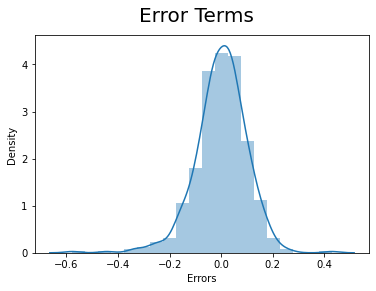

In [82]:
# Error Distribution char for actual and perdicted value
fig = plt.figure()
sns.distplot((y_train_bike - y_model_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors') # x-label
plt.show()

## Step 8: Making Predictions Using the Final Model


In [83]:
# standradise the value 
test_bike[scale_var] = scaler.fit_transform(test_bike[scale_var])
test_bike.describe()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.040909,0.627273,0.538703,0.493549,0.417202,0.492679,0.250,0.245455,0.227273,0.540909,...,0.081818,0.122727,0.122727,0.163636,0.168182,0.136364,0.122727,0.145455,0.022727,0.327273
std,0.198531,0.484633,0.249203,0.204367,0.198584,0.247892,0.434,0.431338,0.420026,0.499460,...,0.274713,0.328872,0.328872,0.370789,0.374881,0.343957,0.328872,0.353363,0.149373,0.470288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.328245,0.348109,0.276108,0.326670,0.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.550228,0.478244,0.392387,0.488393,0.000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.745674,0.638702,0.535854,0.690353,0.250,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [84]:
y_test_bike = test_bike.pop('cnt')
X_test_bike = test_bike

In [85]:
X_test_bike = X_test_bike[col]
X_test_bike = sm.add_constant(X_test_bike)
X_test_bike.drop(['temp','hum','mnth_Feb','mnth_May','mnth_Jun',
                  'mnth_Jul','season_winter','holiday','mnth_Sep','weekday_Monday'],axis=1,inplace=True)

In [86]:
y_test_pred = rfe_model.predict(X_test_bike)

## Step 9: Model Evaluation


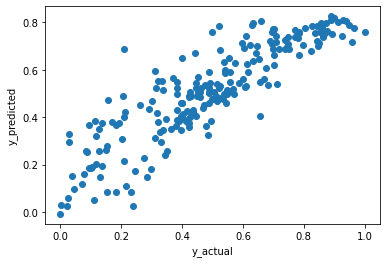

In [87]:
fig = plt.figure()
plt.scatter(y_test_bike, y_test_pred)
plt.xlabel('y_actual')                        
plt.ylabel('y_predicted')   
plt.show()

In [88]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [89]:
#Calculate the r-square value for model on test data 

r_squared_test = r2_score(y_test_bike, y_test_pred)
r_squared_test

0.7644675626708792

In [90]:
#Calculate the r-square value for model on training data 

r_squared_train = r2_score(y_train_bike,y_model_pred)
r_squared_train

0.7975261938129816

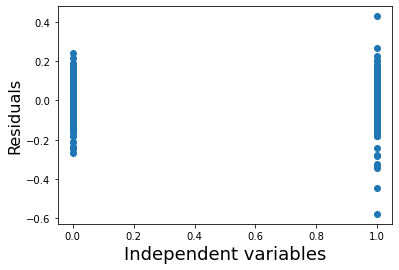

In [91]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_train_rfe.yr_2019,(y_train_bike - y_model_pred))
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

When we have yearly data, then the regression is likely to suffer from autocorrelation because demand next year will certainly be dependent on demand this year. Hence, error terms in different observations will surely be correlated with each other.

In [92]:
# Error Percentage in both rsquared values 
round(abs(r_squared_train - r_squared_test) * 100,2)

3.31

In [93]:
X_train_rfe.columns

Index(['windspeed', 'season_spring', 'season_summer', 'yr_2019', 'mnth_Dec',
       'mnth_Jan', 'mnth_Nov', 'weekday_Sunday',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

In [94]:
rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     196.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.93e-166
Time:                        21:29:20   Log-Likelihood:                 448.50
No. Observations:                 510   AIC:                            -875.0
Df Residuals:                     499   BIC:                            -828.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.6000      0.012     48.870      0.000       0.576       0.624
windspeed                                                                                             -0.1685      0.028     -6.030      0.000      -0.223      -0.114
season_spring                                                                                         -0.2682      0.013    -20.191      0.000      -0.294      -0.242
season_summer                                                                                         -0.0458      0.012     -3.885      0.000      -0.069      -0.023
yr_2019                                                                                                0.2470      0.009     27.390      0.000       0.229       0.265
mnth_Dec                                                                                              -0.1369      0.016     -8.453      0.000      -0.169      -0.105
mnth_Jan                                                                                              -0.1141      0.020     -5.712      0.000      -0.153      -0.075
mnth_Nov                                                                                              -0.1446      0.017     -8.544      0.000      -0.178      -0.111
weekday_Sunday                                                                                        -0.0436      0.013     -3.272      0.001      -0.070      -0.017
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2895      0.026    -10.971      0.000      -0.341      -0.238
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0847      0.010     -8.748      0.000      -0.104      -0.066
==============================================================================
Omnibus:                       80.608   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.395
Skew:                          -0.696   Prob(JB):                     2.14e-61
Kurtosis:                       6.348   Cond. No.                         8.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The Linear Equation of a line becomes

- $ cnt $ = 0.6 - ($ windspeed $ *0.1685) - ($ season spring $ * 0.2682) - ($ season summer $ * 0.0458) + ($ yr 2019 $ * 0.2470) - ($ mnth Dec $ * 0.1369) - ($ mnth Jan $ * 0.1141) -  ($ mnth Nov $ * 0.1446) - ($ weekday Sunday $ * 0.0436) - ($ weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds $ * 0.2895) - ($ weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist $ * 0.0847)